In [30]:
#https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
import scipy.stats as sp

In [56]:
import sklearn

In [12]:
#Plot the volume to see the trend
from matplotlib import pyplot as plt
import numpy as np
import math 
import pandas as pd
df = pd.read_excel(r'C:\Users\xwang\OneDrive - CCMI\Desktop\Python\New folder\Honolulu.xlsx', sheet_name = 'Sheet3')
print (df)

         Time          IHS  FRED Calculated         Diff
0  2016-01-01  4333.932589      4796.973777   463.041188
1  2016-04-01  3424.301109      3831.151304   406.850195
2  2016-07-01  4361.771978      4907.928410   546.156431
3  2016-10-01  3758.132530      4264.671407   506.538877
4  2017-01-01  3668.364822      4180.671955   512.307133
5  2017-04-01  3566.123587      4127.529053   561.405466
6  2017-07-01  4482.269183      5255.564651   773.295469
7  2017-10-01  4099.037485      4824.968433   725.930948
8  2018-01-01  4984.994960      5897.181913   912.186953
9  2018-04-01  4818.850181      5827.104166  1008.253985
10 2018-07-01  3982.529082      4862.693562   880.164481
11 2018-10-01  4011.014984      4947.879218   936.864234
12 2019-01-01  3685.682817      4558.458558   872.775741
13 2019-04-01  3787.764595      4805.787690  1018.023094
14 2019-07-01  3438.265745      4457.273499  1019.007754
15 2019-10-01  3860.097380      5046.838072  1186.740692
16 2020-01-01  3551.416972     

In [34]:
x = df['Time']
print(type(x))
y = df['Diff']

<class 'pandas.core.series.Series'>


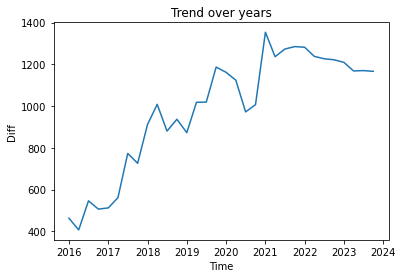

In [31]:
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Diff")
plt.title('Trend over years')
plt.show()

        Time          IHS  FRED Calculated        Diff
0 2016-01-01  4333.932589      4796.973777  463.041188
1 2016-04-01  3424.301109      3831.151304  406.850195
2 2016-07-01  4361.771978      4907.928410  546.156431
3 2016-10-01  3758.132530      4264.671407  506.538877
4 2017-01-01  3668.364822      4180.671955  512.307133


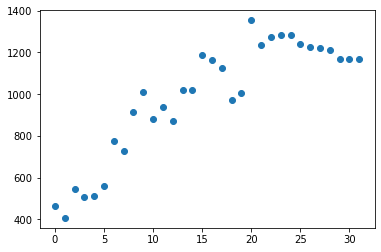

In [32]:
#scatter plot-each data point
print (df.head())
df['Diff'].dropna().plot(marker='o', ls='');

In [48]:
#check type of input 
y=np.array(df['Diff'].dropna().values, dtype=float)
y
x=np.array(pd.to_datetime(df['Diff'].dropna()).index.values, dtype=float)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31.])

In [49]:
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
# fit into linear regression model

In [58]:
print(slope)
print(intercept)
#get coefficients for our model

26.49977010848535
571.2935393103708


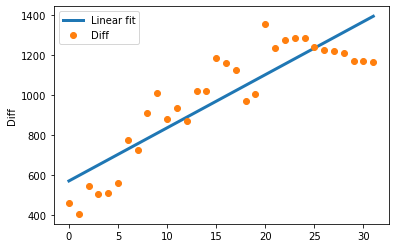

In [54]:
# compare the model with data
f, ax = plt.subplots(1, 1)
yf = (slope*x)+intercept
ax.plot(x, yf,label='Linear fit', lw=3)
df['Diff'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Diff')
ax.legend();

In [50]:
#check how fit our model is
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.8827104790947665 
 p =  2.348626580251417e-11 
 s =  2.575636510578016


In [57]:
#check accurancy of model
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y, yf)

0.7791777899037124